In [5]:
!pip install tabpfn

In [6]:
from tabpfn import TabPFNClassifier

In [9]:
import pandas as pd
data = pd.read_csv('/kaggle/input/breast-cancer-wisconsin-data/data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [10]:
data = data.drop(columns=['id'])
data = data.drop(columns=['Unnamed: 32'])

In [11]:
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [26]:
from kaggle_secrets import UserSecretsClient
import os
user_secrets = UserSecretsClient()

# Set your HF token & username as environment variables
os.environ["HF_TOKEN"] = user_secrets.get_secret("huggingface")
# Replace with your username)
os.environ["HF_USERNAME"] = "megrisdal"
!huggingface-cli whoami


sh221b777


In [27]:
classifier = TabPFNClassifier(device='cpu')

In [28]:
classifier.fit(X_train, y_train)

tabpfn-v2.5-classifier-v2.5_default.ckpt:   0%|          | 0.00/42.9M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/35.0 [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/tabpfn/classifier.py:616: UserWarning: Running on CPU with more than 200 samples may be slow.
Consider using a GPU or the tabpfn-client API: https://github.com/PriorLabs/tabpfn-client
  check_cpu_warning(


,n_estimators,8
,categorical_features_indices,None
,softmax_temperature,0.9
,balance_probabilities,False
,average_before_softmax,False
,model_path,'auto'
,device,'cpu'
,ignore_pretraining_limits,False
,inference_precision,'auto'
,fit_mode,'fit_preprocessors'
,memory_saving_mode,'auto'


Accuracy: 0.9825
Latency: 43.4971

Classification Report:
              precision    recall  f1-score   support

           B       0.97      1.00      0.99        71
           M       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



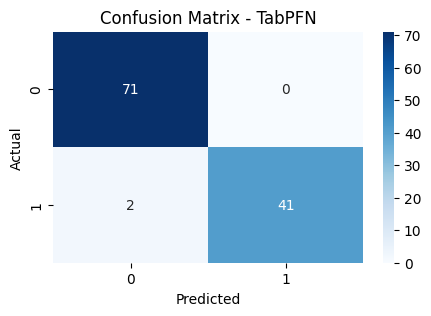

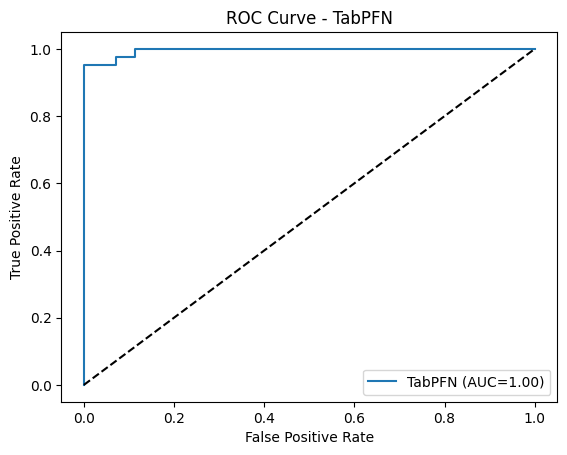

**************************************************


In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
import time
name = "TabPFN"

results = {}

model = classifier
start_pred_time = time.time()
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]
pred_time = time.time() - start_pred_time
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Latency: {pred_time:.4f}")
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix - {name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

roc_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label="M")
plt.plot(fpr, tpr, label=f'{name} (AUC={roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve - {name}")
plt.legend()
plt.show()

# Save accuracy
results[name] = accuracy

# Separator
print("*" * 50)
